
# I.	Introduction

This project presents a comprehensive analysis of a loans dataset collected from an app designed to accelerate debt payoff by rounding up everyday purchases. The primary business goal is to understand user debt profiles, behavior regarding loan engagement, and the overall potential for reducing interest through the app. Although additional dimensions are not available for integration, this analysis focuses solely on the loans dataset to generate actionable insights and set the stage for further analysis. The scope includes descriptive statistics, time series trends, subgroup comparisons, and exploratory data mining, all to inform strategic decisions around customer segmentation, product improvement, and potential automation of business processes.


In [2]:
# Set-up

import pandas as pd
from dotenv import load_dotenv
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

file_path = f'.{os.getenv('CLEANED_OUTPUT_PATH')}/cleanedLoans.csv'

df = pd.read_csv(file_path)

# II.	Data Description

- **UID** - user_id 
- **Is_Linked** - user adds the loans to the app and can see them. can be enabled. 
- **Is_Enabled** - enabled the loan for pay off, the user can begin to pay off the debt
- **Interest_Rate** - interest rate on the loan
- **Minimum_Payment** - minimum payment for the loan
- **Current_Loan_Balance** - the loans current balance
- **Original_Loan_Balance** - the loans original balance at issuance 
- **Loan_Provider** - provider of the loan 
- **Date_Issued** - date the loan was issued
- **Loan_Term** - term of the loan, credit cards have 999 since they are revolving
- **Date_Linked** - date the loan was linked 
- **Loan_Last_Payment** - date the user last sent a payment to their loan through the app
- **Is_Primary_Loan** - primary loan of the user
- **Loan_Type** - type of loan
- **Unique_Saved_In_Interest** - amount the user has saved on the loan using the app

Data cleaning has been performed to address missing values, ensure proper data types (including converting date fields), and perform logical transformations such as setting the loan term for credit cards. The cleaning process includes replacing null values, converting percentage rates, and handling non-datetime fields appropriately.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57020 entries, 0 to 57019
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UID                       57020 non-null  object 
 1   Is_Linked                 57020 non-null  object 
 2   Is_Enabled                57020 non-null  object 
 3   Interest_Rate             57020 non-null  float64
 4   Minimum_Payment           57020 non-null  float64
 5   Current_Loan_Balance      57020 non-null  float64
 6   Original_Loan_Balance     57020 non-null  float64
 7   Loan_Provider             57020 non-null  object 
 8   Date_Issued               57020 non-null  object 
 9   Loan_Term                 57020 non-null  int64  
 10  Date_Linked               57020 non-null  object 
 11  Loan_Last_Payment         9031 non-null   object 
 12  Is_Primary_Loan           57020 non-null  object 
 13  Loan_Type                 57020 non-null  object 
 14  Unique

In [4]:
df['UID'].nunique()

7939

# III.	Methodology

This analysis is structured as follows:
1)	**Data Cleaning & Preparation:** Ensure date columns are properly formatted and handle missing values.
2)	**Exploratory Data Analysis (EDA):** Examine key metrics (loan balances, interest rates, payment behavior) and visualize trends.
3)	**Statistical & Business Analysis:** Apply descriptive statistics and hypothesis testing to assess differences among subgroups.
4)	**Predictive & Segmentation Analysis:** Use clustering and regression concepts to identify patterns in user engagement and savings.
5)	**Visualization & Reporting:** Generate charts and dashboards for business intelligence.
6)	**Discussion & Recommendations:** Summarize findings, note limitations, and propose next steps.


# IV. Findings and Analysis

## a. Decision Science / Business Statistics

We explore key questions using statistical summaries and tests:
- **Do users with linked loans differ in balances or savings compared to non-linked loans?**
- **Are there statistically significant differences in savings across loan types?**

These questions can help us prove the true value that the Changed App provides to users. 

### Code: Descriptive Stats & Hypothesis Testing

In [5]:
# Load dataset and ensure dates are parsed correctly
df = pd.read_csv(file_path)
date_cols = ['Date_Issued', 'Date_Linked', 'Loan_Last_Payment']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create a flag
df['Is_Linked_Flag'] = df['Is_Linked'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

linked_stats = df.groupby('Is_Linked_Flag')[['Current_Loan_Balance', 'Unique_Saved_In_Interest']].agg(['mean','median','std'])
print("Descriptive Statistics by Loan Linking Status:")
print(linked_stats)

# Hypothesis Test: Do linked vs. non-linked loans differ in average savings?
linked_savings = df[df['Is_Linked_Flag'] == 1]['Unique_Saved_In_Interest']
nonlinked_savings = df[df['Is_Linked_Flag'] == 0]['Unique_Saved_In_Interest']

# Remove potential outliers by focusing on the 95th percentile
upper_limit = df['Unique_Saved_In_Interest'].quantile(0.95)
linked_savings = linked_savings[linked_savings <= upper_limit]
nonlinked_savings = nonlinked_savings[nonlinked_savings <= upper_limit]

t_stat, p_value = stats.ttest_ind(linked_savings, nonlinked_savings, nan_policy='omit')
print(f"\nT-test for Unique Saved In Interest (Linked vs. Non-linked): t-stat={t_stat:.3f}, p-value={p_value:.3f}")


Descriptive Statistics by Loan Linking Status:
               Current_Loan_Balance                        \
                               mean  median           std   
Is_Linked_Flag                                              
0                      17324.986012  3045.0  59808.739347   
1                      13078.634538  2438.0  52146.915551   

               Unique_Saved_In_Interest                      
                                   mean median          std  
Is_Linked_Flag                                               
0                           1005.003279   0.00  5595.093676  
1                           1163.717776  53.47  5451.563736  

T-test for Unique Saved In Interest (Linked vs. Non-linked): t-stat=27.061, p-value=0.000


## Interpretation of the Results:

**Interpretation**: This statistically significant result indicates a clear difference between the two groups; linked loans are associated with higher savings compared to non-linked loans.

- The above code prints summary statistics by linked status.
- The t-test examines whether the mean savings differ significantly between linked and non-linked groups.


Here, the median for non-linked loans is $0, implying that many users who haven't linked their loans haven't saved any interest. 
In contrast, linked loans show a positive median, meaning that a substantial number of users are indeed saving money on interest once they link their loans.


In this case, 27.061 is a very high t-value, suggesting that the difference in saved interest between linked and non-linked loans is substantial and not due to random variation.
A p-value of 0.000 (which is really just < 0.0001) means that the probability of seeing such a large difference by random chance alone is nearly zero.

**In business terms**: The difference in saved interest between linked and non-linked loans is real and meaningful.

#### **What This Means for the Business**
- Users who link their loans save significantly more in interest than those who don't.
- The difference is not due to random chance, loan linking is genuinely beneficial.
- Encouraging more users to link their loans could increase customer satisfaction and retention.
- Since we have strong evidence, we can use this as a marketing strategy to drive engagement.




## b. Introduction to Business Analytics
Business analytics involves using data insights to drive decisions. In this analysis, we:
- Track trends over time: Loan issuance, linking, and payment activities.
- Segment users: Identify clusters based on financial characteristics.

### Code: Time Series Analysis

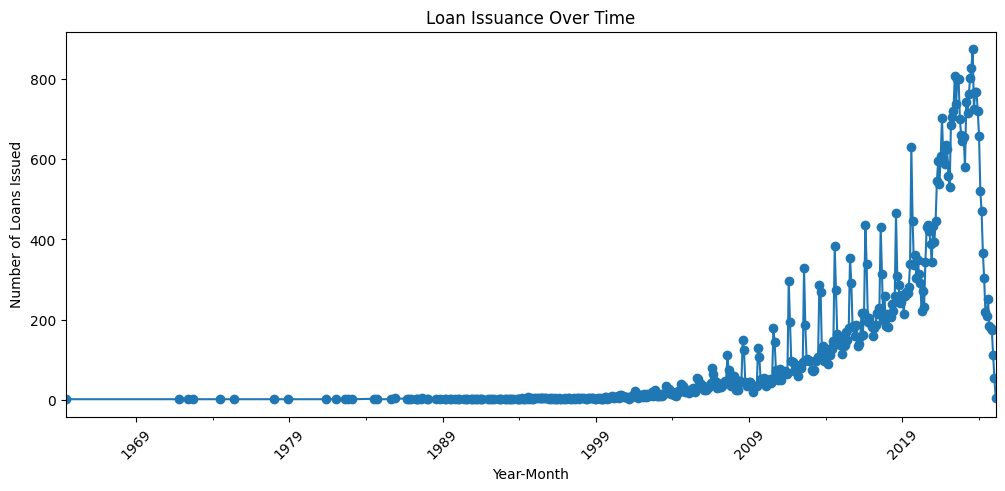

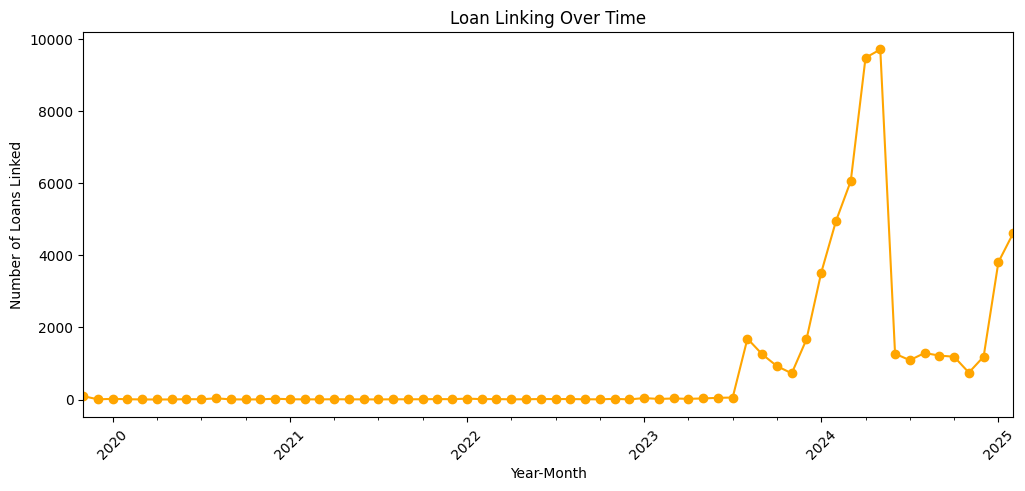

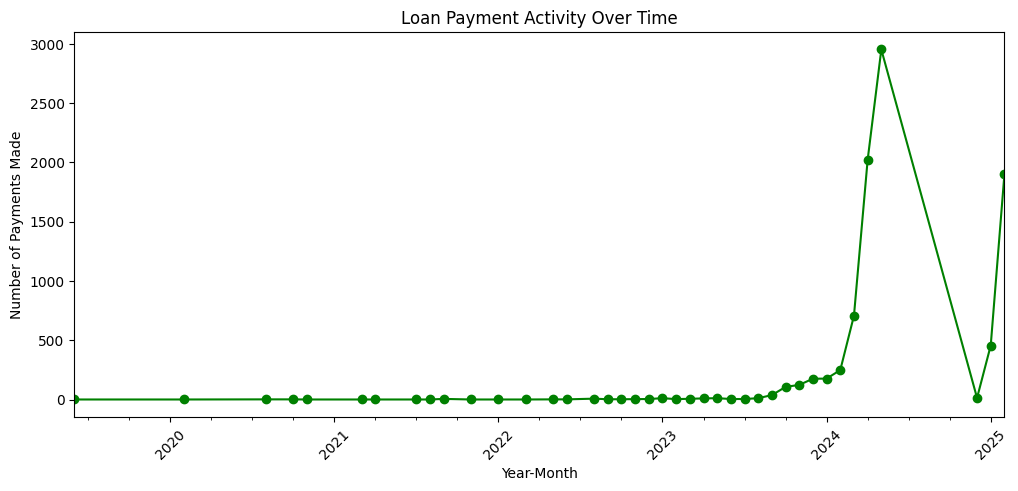

In [6]:
# Trend Analysis: Monthly trends for loan issuance, linking, and payments
df['YearMonth_Issued'] = df['Date_Issued'].dt.to_period('M')
df['YearMonth_Linked'] = df['Date_Linked'].dt.to_period('M')
df['YearMonth_Payment'] = df['Loan_Last_Payment'].dt.to_period('M')

# Plot loan issuance over time
plt.figure(figsize=(12,5))
issued_trend = df.groupby('YearMonth_Issued').size()
issued_trend.plot(kind='line', marker='o')
plt.title('Loan Issuance Over Time')
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans Issued")
plt.xticks(rotation=45)
plt.show()

# Plot loan linking over time
plt.figure(figsize=(12,5))
linked_trend = df.groupby('YearMonth_Linked').size()
linked_trend.plot(kind='line', marker='o', color='orange')
plt.title('Loan Linking Over Time')
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans Linked")
plt.xticks(rotation=45)
plt.show()

# Plot loan last payment activity over time
plt.figure(figsize=(12,5))
payment_trend = df.groupby('YearMonth_Payment').size()
payment_trend.plot(kind='line', marker='o', color='green')
plt.title('Loan Payment Activity Over Time')
plt.xlabel("Year-Month")
plt.ylabel("Number of Payments Made")
plt.xticks(rotation=45)
plt.show()

## c. Business Intelligence / Business Data Visualization 
Business intelligence (BI) involves creating dashboards and reports. For our dataset, we can develop:
- Interactive visualizations (using tools like Plotly or Tableau).
- Summary reports that highlight key performance metrics.

### Code: Sample Dashboard Elements (using matplotlib & seaborn)

/var/folders/81/20kbk80x15n467ykj_mqdq0h0000gn/T/ipykernel_99212/1412184043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Loan_Type',


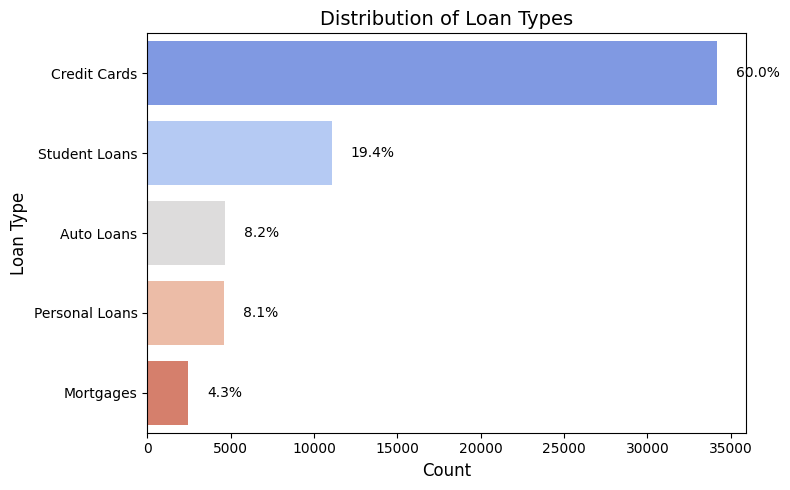

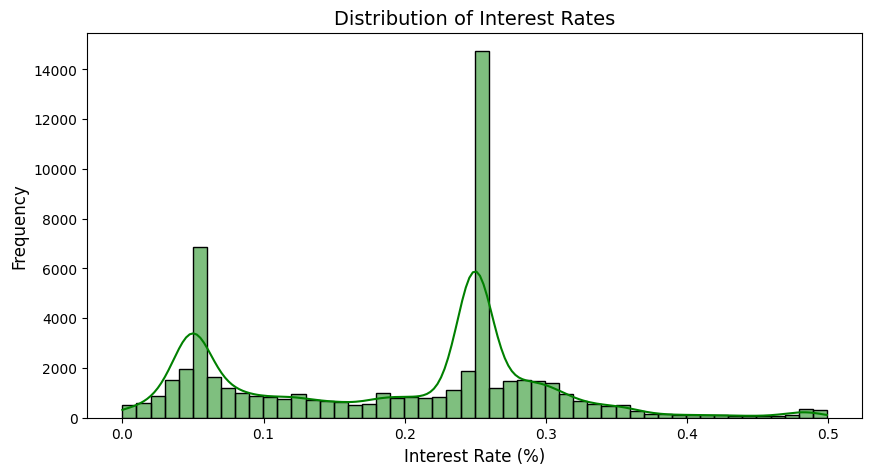

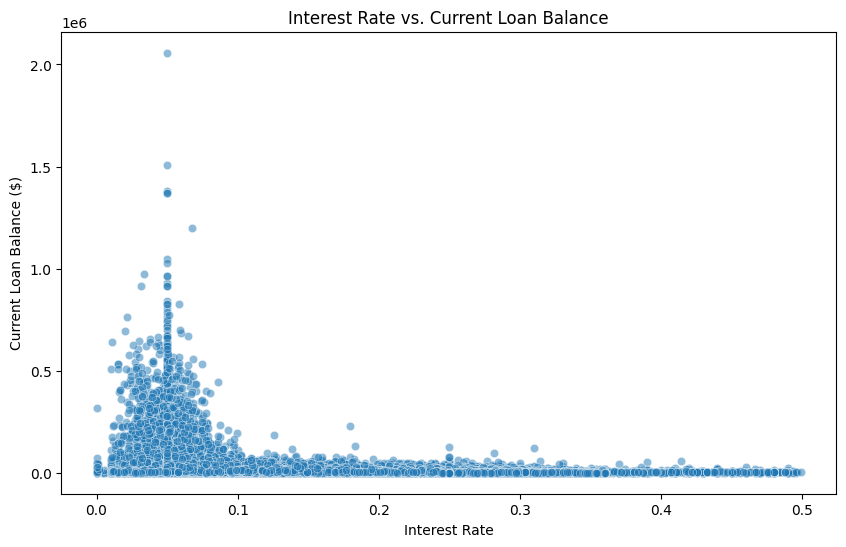

In [7]:
# Distribution of Loan Types with Percentage Labels
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, y='Loan_Type', 
                 order=df['Loan_Type'].value_counts().index, 
                 palette='coolwarm')

# Calculate percentages
total = len(df['Loan_Type'])
for p in ax.patches:
    percentage = p.get_width() / total * 100
    x = p.get_x() + p.get_width() + 0.02 * total  # Position text slightly right
    y = p.get_y() + p.get_height()/2  # Center vertically
    ax.annotate(f'{percentage:.1f}%', (x, y), 
                ha='left', va='center')

plt.title("Distribution of Loan Types", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Loan Type", fontsize=12)
plt.tight_layout()
plt.show()

# Interest Rate Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Interest_Rate"], bins=50, kde=True, color="green")
plt.title("Distribution of Interest Rates", fontsize=14)
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


# Interest Rate vs. Current Loan Balance
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Interest_Rate', y='Current_Loan_Balance', alpha=0.5)
plt.title("Interest Rate vs. Current Loan Balance")
plt.xlabel("Interest Rate")
plt.ylabel("Current Loan Balance ($)")
plt.show()


## d. Data Mining Tools
Data mining involves uncovering patterns from large datasets. Here, we perform a clustering analysis to segment users based on loan characteristics.

### Code: Clustering with K-Means

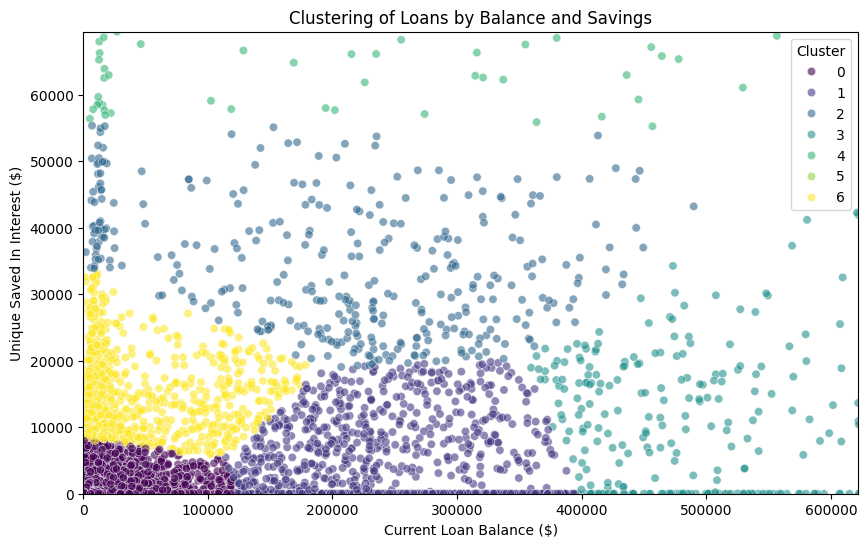

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['Current_Loan_Balance', 'Unique_Saved_In_Interest']].copy()

features.fillna(0, inplace=True)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Current_Loan_Balance', y='Unique_Saved_In_Interest', hue='Cluster', palette="viridis", alpha=0.6)
plt.title("Clustering of Loans by Balance and Savings")
plt.xlabel("Current Loan Balance ($)")
plt.ylabel("Unique Saved In Interest ($)")
plt.xlim(0, df['Current_Loan_Balance'].quantile(.999))
plt.ylim(0, df['Unique_Saved_In_Interest'].quantile(.999))
plt.show()

## Interpreting the Scatterplot
The scatterplot shows each loan’s balance vs. interest saved, colored by cluster. By examining where clusters form, you gain insights into which users might be doing well (high savings) vs. which users might need more engagement (high balance, low savings). This clustering reveals natural user segments, enabling more targeted marketing, improved user experience, and better resource allocation.

### Color Coding by Cluster
- Each color (purple, yellow, etc.) represents a different cluster.
- Points in the same cluster share similar profiles in all three features (loan balance, interest rate, and savings), even though only two features are shown on the scatterplot.

### Possible Observations
- **Cluster 0 (Purple)**:
    - **Profile**: High loan balances, low savings.  
    - **Implication**: Users with large debts but minimal engagement with savings features (e.g., not refinancing or optimizing payments).
- **Cluster 1 (Teal)**:
    - **Profile**: Moderate balances, potential outliers, moderate savings.  
    - **Implication**: Partially engaged users who benefit from the app but could optimize further.
- **Cluster 2 (Yellow)**:
    - **Profile**: Low balances, high savings.
    - **Implication**: Highly engaged users successfully paying down loans and maximizing interest savings.

### Business Application
- If a cluster has low savings but high balances, target them with campaigns to use more of the app’s payoff features.
- We can target the users in cluster 0 with in-app upsells to increase they're payment minimum on loan payoffs.
- If a cluster has low balances and high savings, they might be our success stories or brand ambassadors.


## e. Database Management Systems / Business Data Warehousing / Business Process Automation
Since our source data is coming from a DWH, this section will provide the system and model that supports this dataset.

- Star Schema
- SCD-Type 1 (Type 1 Slowly Changing Dimension)
    - In data warehousing, a Type 1 Slowly Changing Dimension (SCD) simply overwrites existing data with new values without retaining any historical information, making it the simplest method for managing changes in dimension tables. This is a similar approach to what we are simulating via the clean.py

Please visit: [Lucidchart](https://lucid.app/lucidchart/0325633c-3f09-4ca0-8180-62af145ee3e9/edit?page=0_0#) for the full data architecture

### ETL Framework:

<img src="./images/etlDataform.png" width="1200"/>



### Local ETL Example 
**Run using clean.py in scr**

```python
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

input = os.getenv('RAW_SOURCE_PATH')
output = os.getenv('CLEANED_OUTPUT_PATH')


def cleanLoans(input_path, output_path):
    print('START')
    loans_df = pd.read_csv(input_path, dtype=str)
    
    # transform 1 - nulls / columns
    try:
        print('TRANSFORM: Nulls & Columns')
        loans_df['Original_Loan_Balance'] = loans_df['Original_Loan_Balance'].fillna(loans_df['Credit_Limit'])
        loans_df.drop(columns=['Credit_Limit', 'No_Match', 'Activity_Designator', 'event_date'], inplace=True)
        loans_df.loc[loans_df['Loan_Type'] == 'Credit Cards', 'Loan_Term'] = 0
        loans_df.loc[loans_df['Loan_Type'] == 'Student Loans EFX', 'Loan_Type'] = 'Student Loans'
        loans_df['Is_Enabled'] = loans_df['Is_Enabled'].fillna('No')
        loans_df['Is_Linked'] = loans_df['Is_Linked'].fillna('No')
        loans_df['Current_Loan_Balance'] = loans_df['Current_Loan_Balance'].fillna(0)
        loans_df.dropna(subset=['Loan_Provider', 'Interest_Rate', 'Original_Loan_Balance', 'Minimum_Payment', 'Date_Linked', 'Loan_Term'], inplace=True)
    except Exception as e:
        print(f"\n\nERROR during transform 1 - nulls / columns: {str(e)}\n\n")

    # transform 2 - dtype conversion
    try:
        print('TRANSFORM: Data Types')
        loans_df['Interest_Rate'] = pd.to_numeric(loans_df['Interest_Rate']) / 100
        loans_df['Minimum_Payment'] = pd.to_numeric(loans_df['Minimum_Payment'])
        loans_df['Current_Loan_Balance'] = pd.to_numeric(loans_df['Current_Loan_Balance'])
        loans_df['Original_Loan_Balance'] = pd.to_numeric(loans_df['Original_Loan_Balance'])
        loans_df['Loan_Term'] = pd.to_numeric(loans_df['Loan_Term'])
        loans_df['Unique_Saved_In_Interest'] = pd.to_numeric(loans_df['Unique_Saved_In_Interest'])
        loans_df['Date_Issued'] = pd.to_datetime(loans_df['Date_Issued'], format='mixed', errors='coerce')
        loans_df['Date_Linked'] = pd.to_datetime(loans_df['Date_Linked'], format='mixed', errors='coerce')
        loans_df['Loan_Last_Payment'] = pd.to_datetime(loans_df['Loan_Last_Payment'], format='mixed', errors='coerce')
    except Exception as e:
        print(f"\n\nERROR during transform 2 - dtype conversion: {str(e)}\n\n")
        
    # transform 3 - remove negative link time cases
    try:
        print('TRANSFORM: Removing negative link time cases')
        # Drop loans where Date_Linked is before Date_Issued
        loans_df = loans_df[loans_df['Date_Linked'] >= loans_df['Date_Issued']]
    except Exception as e:
        print(f"\n\nERROR during transform 3 - negative link time removal: {str(e)}\n\n")
    
    # transform 4 - logical cleaning
    try:
        print('TRANSFORM: Logical')
        loans_df = loans_df[loans_df['Interest_Rate'].astype(float) <= 0.50]
        loans_df = loans_df[loans_df['Loan_Term'].astype(float) <= 480]
    except Exception as e:
        print(f"\n\nERROR during transform 4 - logical cleaning: {str(e)}\n\n")
    
    try:
        loans_df.to_csv(f'{output_path}/cleanedLoans.csv', index=False)
    except Exception as e:
        print(f"\n\nERROR during CSV export: {str(e)}\n\n")
    

def main():    
    try:
        print('-------------------Running Main-------------------')
        cleanLoans(input, output)
        print('-------------------SUCCESS-------------------')
    except Exception as e:
        print(f"\n\nERROR: {str(e)}\n\n")


if __name__ == "__main__":
    main()
```



# V. Conclusion and Recommendations
Conclusion:
- Key Findings:
    - There are significant differences in loan balances and savings between linked and non-linked loans.
    - Time series trends indicate specific periods with higher loan issuance and linking activity.
    - Clustering reveals distinct segments that may benefit from tailored interventions.


# VI. Limitations
- Data Scope: Analysis is limited to the loans dataset. Lack of demographic or behavioral data restricts deeper insights.
- Missing Data: High missing values in Loan_Last_Payment may bias the analysis.
- Assumptions: Some business rules (like '999' for credit cards) are assumed and may need validation.
- Scalability: CSV-based analysis is not ideal for real-time decision-making.



# Appendix
Below are additional code snippets and exploratory steps used in the analysis.

## Data Cleaning Recap
```python
# Convert dates and handle missing values
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Fill missing values for Current Loan Balance with 0 if needed
df['Current_Loan_Balance'] = df['Current_Loan_Balance'].fillna(0)
```

## Additional Visualizations
```python
# Scatter Plot: Minimum Payment vs. Current Loan Balance
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Minimum_Payment', y='Current_Loan_Balance', alpha=0.5)
plt.title("Minimum Payment vs. Current Loan Balance")
plt.xlabel("Minimum Payment ($)")
plt.ylabel("Current Loan Balance ($)")
plt.show()
```